<a href="https://colab.research.google.com/github/idanhasdai/Dogs-VS-Cats-Classifier/blob/main/Cats_vs_Dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

In [ ]:
#upload images
#https://drive.google.com/file/d/1-1QZ65R2lWBjBxaOXOXb9VxOYb83dkec/view?usp=sharing
zip_id = "1-1QZ65R2lWBjBxaOXOXb9VxOYb83dkec"
!gdown --id {zip_id} -O cats_vs_dogs.zip

# extracting the files
!unzip cats_vs_dogs.zip -d cats_vs_dogs
print('-'*20+'\n Upload Completed!!\n'+'-'*20)

Streaming output truncated to the last 5000 lines.
  inflating: cats_vs_dogs/test/cats/cat.5675.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5532.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5564.jpg  
  inflating: cats_vs_dogs/test/cats/cat.552.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5575.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5610.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5519.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5642.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5584.jpg  
  inflating: cats_vs_dogs/test/cats/cat.563.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5529.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5623.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5527.jpg  
  inflating: cats_vs_dogs/test/cats/cat.557.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5561.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5574.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5667.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5719.jpg  
  inflating: cats_vs_dogs/test/cat

(-0.5, 488.5, 498.5, -0.5)

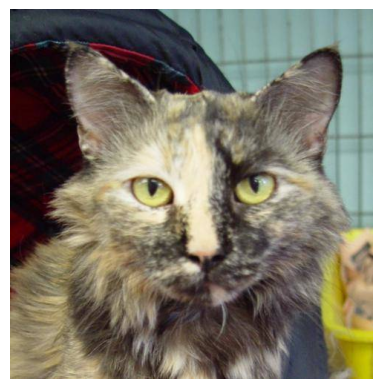

In [ ]:
#show one image of tarin cat
img_path ='cats_vs_dogs/train/cats/cat.10.jpg'
img = load_img(img_path)
plt.imshow(img)
plt.axis("off")

(-0.5, 449.5, 355.5, -0.5)

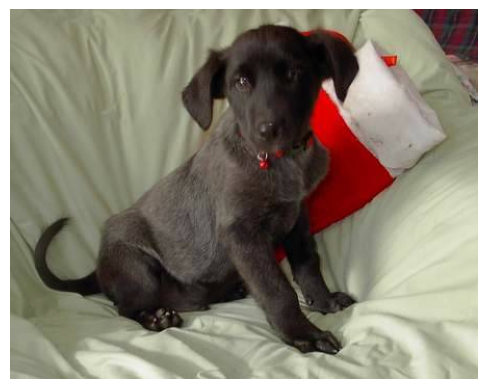

In [ ]:
#show one image of test dog
dog_image = 'cats_vs_dogs/test/dogs/dog.12138.jpg'
img2 = load_img(dog_image)
plt.imshow(img2)
plt.axis('off')

In [ ]:
#Use Image ImageDataGenerator to create train_datagen and test_datagen
#making sure to rescale all sets
train_datagen = ImageDataGenerator(
    rescale = (1./255),
    rotation_range = 30,
    width_shift_range = 0.15,
    height_shift_range = 0.2,
    shear_range = 0.25,
    zoom_range = 0.17,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = (1./255)
)

In [ ]:
#define the train_path and the test_path
train_path = 'cats_vs_dogs/train'
test_path = 'cats_vs_dogs/test'

In [ ]:
#use flow_from_directory to create train_generator and test_generator
np.random.seed(42)
train_generator = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)
test_generator = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
#printing category names using class_indices
print(train_generator.class_indices)
print(test_generator.class_indices)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


In [ ]:
# Define model
model = tf.keras.Sequential([
    tf.keras.Input(shape = (150,150,3)),

    tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [ ]:
# Compile model
model.compile(
    loss =  'binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    epsilon=1e-07
    ),
    metrics = ['accuracy']
)

In [ ]:
# Train model
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 227ms/step - accuracy: 0.5879 - loss: 0.7563 - val_accuracy: 0.6688 - val_loss: 0.5857
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 221ms/step - accuracy: 0.6856 - loss: 0.5931 - val_accuracy: 0.7366 - val_loss: 0.5325
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 221ms/step - accuracy: 0.7272 - loss: 0.5419 - val_accuracy: 0.7092 - val_loss: 0.5773
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 223ms/step - accuracy: 0.7400 - loss: 0.5211 - val_accuracy: 0.7866 - val_loss: 0.4509
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 216ms/step - accuracy: 0.7534 - loss: 0.5026 - val_accuracy: 0.7604 - val_loss: 0.4786
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 213ms/step - accuracy: 0.7683 - loss: 0.4859 - val_accuracy: 0.7762 - val_loss: 0.4605
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 222ms/step - accuracy: 0.7787 - loss: 0.4729 - val_accuracy: 0.7808 - val_loss: 0.4577
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 214ms/step - accuracy: 0.7785 -

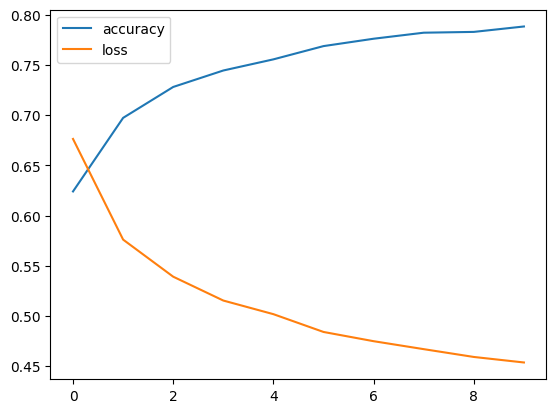

In [ ]:
#plot loss and accuracy curves
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
dog


(-0.5, 149.5, 149.5, -0.5)

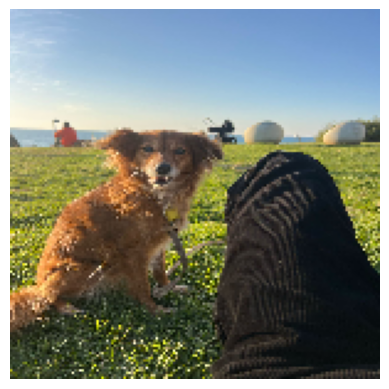

In [ ]:
#testing my model with a picture of my dog
bunny_img = 'bunny.jpg'

#loading the image from the path using load_img
bunny = load_img(bunny_img,target_size = (150,150,3))
#converting the image with numpy array with img_to_array method
bunny = img_to_array(bunny)
#using np.expAnd_dims to add 1 more dim. on axis=0 tot the array
bunny = np.expand_dims(bunny,axis = 0)
#normalize the result
bunny = bunny/255.
#predict if the image is of a cat 😈or a dog😇
pred = model.predict(bunny)

if pred > 0.5:
  print('dog')
else:
  print('cat')
plt.imshow(bunny[0])
plt.axis('off')
